## Assignment 1

### Srinikethan Pusthay (SXP210162)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\psrin\OneDrive - The University of Texas at Dallas\Desktop\Srini UTD\BUAN 6341\Assignment\SeoulBikeData.csv',encoding = 'unicode_escape',index_col=0)

In [3]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.columns = ['rented_bike_count', 'hour','temperature_in_c','humidity_percentage','wind_speed_mps','visibility_10m','dew_point_temperature_in_c','solar_radiation','rainfall_mm','snowfall_cm','seasons','holiday','functioning_day']

In [5]:
data.loc[data["seasons"] == "Spring", "seasons"] = 1
data.loc[data["seasons"] == "Summer", "seasons"] = 2
data.loc[data["seasons"] == "Autumn", "seasons"] = 3
data.loc[data["seasons"] == "Winter", "seasons"] = 4
data.loc[data["functioning_day"] == "Yes", "functioning_day"] = 1
data.loc[data["functioning_day"] == "No", "functioning_day"] = 0
data.loc[data["holiday"] == "Holiday", "holiday"] = 1
data.loc[data["holiday"] == "No Holiday", "holiday"] = 0

<AxesSubplot:>

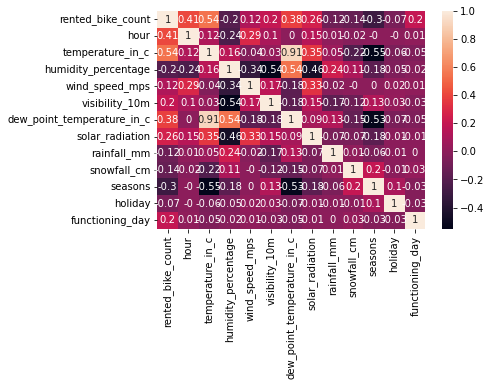

In [6]:
import seaborn as sns
data_float = data.astype('float64')
matrix = data_float.corr().round(2)
sns.heatmap(matrix, annot=True)

In [7]:
data = data.reset_index(drop=True)
data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [8]:
x = data[[1,2,3,4,5,6,7,8,9,10,11,12]].values
y = data[[0]].values

In [10]:
print(x.shape, y.shape)

(8760, 12) (8760, 1)


In [11]:
x_train, x_test = x[:6132,:], x[6132:,:]
print(x_train.shape, x_test.shape)

(6132, 12) (2628, 12)


In [12]:
y_train, y_test = y[:6132,:], y[6132:,:]
print(y_train.shape, y_test.shape)

(6132, 1) (2628, 1)


In [13]:
def feature_normalization(X):
    X = X.astype(float)
    mu = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    Z = (X-mu)/std
    return Z

In [14]:
x_train = feature_normalization(x_train)
x_train

array([[-1.65963092, -1.2833281 , -0.97185638, ...,  1.2886882 ,
        -0.22199395,  0.08882312],
       [-1.51516769, -1.30650552, -0.9240218 , ...,  1.2886882 ,
        -0.22199395,  0.08882312],
       [-1.37070446, -1.34513456, -0.87618722, ...,  1.2886882 ,
        -0.22199395,  0.08882312],
       ...,
       [-0.35946184,  1.38980111,  0.79802308, ..., -0.26809589,
        -0.22199395,  0.08882312],
       [-0.21499861,  1.4825108 ,  0.46318102, ..., -0.26809589,
        -0.22199395,  0.08882312],
       [-0.07053537,  1.56749467,  0.0326698 , ..., -0.26809589,
        -0.22199395,  0.08882312]])

In [15]:
X0 = np.ones((len(x_train),1))
x_train = np.append(X0,x_train,axis=1)
print(x_train.shape)

(6132, 13)


In [16]:
x_test = feature_normalization(x_test)

In [17]:
X1 = np.ones((len(x_test),1))
x_test = np.append(X1,x_test,axis=1)
print(x_test.shape)

(2628, 13)


In [18]:
theta = np.zeros((x_train.shape[1]))
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
def hypothesis(x,theta):
    htheta = np.dot(x,theta.T)
    return htheta

In [20]:
def costfunction(x,y,theta):
    m=len(x)
    htheta = hypothesis(x,theta)
    jtheta = (htheta - y.T)**2
    jthetasum = jtheta.sum()/(2*m)
    return jthetasum

In [21]:
def gradientDescent(x,y,alpha,num_iters):
    m = len(y)
    theta = np.zeros((x.shape[1]))
    error = []
    for i in range(num_iters):
        jtheta = costfunction(x,y,theta)
        error.append(jtheta)
        htheta = hypothesis(x,theta)
        delta = (np.dot((htheta-y.T),x))
        deltasum = (np.sum(delta,axis = 0)/m)*alpha
        theta = theta - deltasum
    return theta, error

In [22]:
iteration = 1000
alpha = 0.01
theta, error = gradientDescent(x_train,y_train,alpha,iteration)

In [23]:
theta

array([ 649.87523706,  175.83428419,  242.2558438 , -167.91348974,
         26.75497281,   34.65806923,  146.64739298,  -44.11492441,
        -64.3577409 ,   19.1108446 ,  -79.2065152 ,  -19.91291951,
         70.60859335])

In [24]:
print(max(error),min(error))

413352.87092302676 91375.20582315007


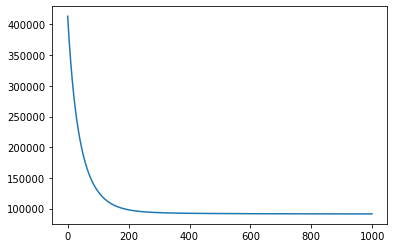

In [25]:
plt.plot(error)

## Experiment 1

In [102]:

theta1, error1 = gradientDescent(x_train,y_train,0.1,500)
theta2, error2 = gradientDescent(x_train,y_train,0.01,1000)
theta3, error3 = gradientDescent(x_train,y_train,0.001,5000)
theta4, error4 = gradientDescent(x_train,y_train,0.0001,10000)

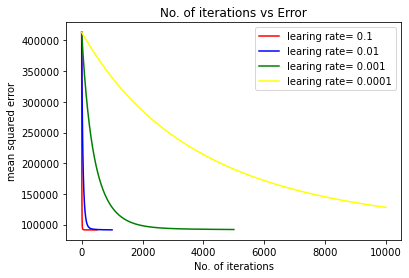

In [103]:
Iter_1= np.arange(1,501)

plt.plot(error1, color='red', label="learing rate= 0.1")
plt.plot(error2, color='blue', label="learing rate= 0.01")
plt.plot(error3, color='green', label="learing rate= 0.001")
plt.plot(error4, color='yellow', label="learing rate= 0.0001")



plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

### 100 iterations

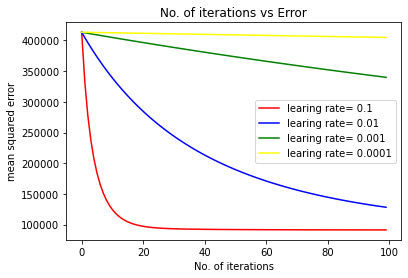

In [28]:
iterations = 100
theta1, error1 = gradientDescent(x_train,y_train,0.1,iterations)
theta2, error2 = gradientDescent(x_train,y_train,0.01,iterations)
theta3, error3 = gradientDescent(x_train,y_train,0.001,iterations)
theta4, error4 = gradientDescent(x_train,y_train,0.0001,iterations)


plt.plot(error1, color='red', label="learing rate= 0.1")
plt.plot(error2, color='blue', label="learing rate= 0.01")
plt.plot(error3, color='green', label="learing rate= 0.001")
plt.plot(error4, color='yellow', label="learing rate= 0.0001")



plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

### 1000 iterations

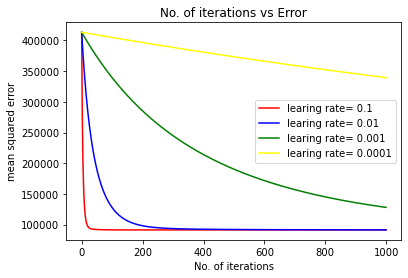

In [29]:
iterations = 1000
theta1, error1 = gradientDescent(x_train,y_train,0.1,iterations)
theta2, error2 = gradientDescent(x_train,y_train,0.01,iterations)
theta3, error3 = gradientDescent(x_train,y_train,0.001,iterations)
theta4, error4 = gradientDescent(x_train,y_train,0.0001,iterations)

Iter_1= np.arange(1,1001)

plt.plot(error1, color='red', label="learing rate= 0.1")
plt.plot(error2, color='blue', label="learing rate= 0.01")
plt.plot(error3, color='green', label="learing rate= 0.001")
plt.plot(error4, color='yellow', label="learing rate= 0.0001")



plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

### 10000 iterations

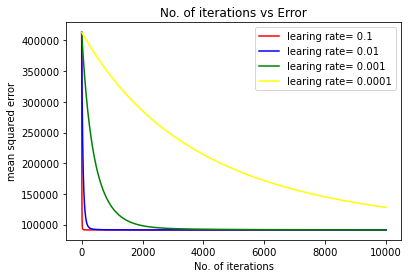

In [30]:
iterations = 10000
theta1, error1 = gradientDescent(x_train,y_train,0.1,iterations)
theta2, error2 = gradientDescent(x_train,y_train,0.01,iterations)
theta3, error3 = gradientDescent(x_train,y_train,0.001,iterations)
theta4, error4 = gradientDescent(x_train,y_train,0.0001,iterations)


plt.plot(error1, color='red', label="learing rate= 0.1")
plt.plot(error2, color='blue', label="learing rate= 0.01")
plt.plot(error3, color='green', label="learing rate= 0.001")
plt.plot(error4, color='yellow', label="learing rate= 0.0001")



plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()



### Optimum Learning Rate

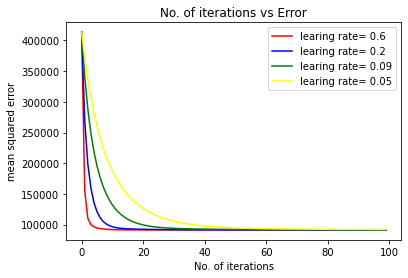

91287.62918782818 91289.97678261438 91418.80114903301 91965.2156712936


In [105]:
iterations = 100
theta1, error1 = gradientDescent(x_train,y_train,0.6,iterations)
theta2, error2 = gradientDescent(x_train,y_train,0.2,iterations)
theta3, error3 = gradientDescent(x_train,y_train,0.09,iterations)
theta4, error4 = gradientDescent(x_train,y_train,0.05,iterations)


plt.plot(error1, color='red', label="learing rate= 0.6")
plt.plot(error2, color='blue', label="learing rate= 0.2")
plt.plot(error3, color='green', label="learing rate= 0.09")
plt.plot(error4, color='yellow', label="learing rate= 0.05")



plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

print(min(error1), min(error2), min(error3), min(error4))

### Train and Test

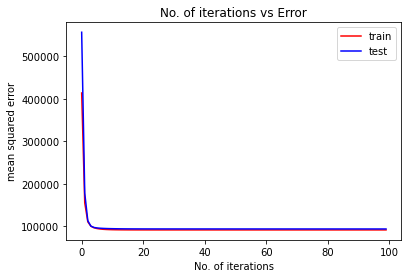

In [37]:
iterations = 100
theta1, error1 = gradientDescent(x_train,y_train,0.6,iterations)
theta2, error2 = gradientDescent(x_test,y_test,0.6,iterations)


plt.plot(error1, color='red', label="train")
plt.plot(error2, color='blue', label="test")


plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

## Experiment 2

In [83]:
def gradientDescent_threshold(x,y,alpha,num_iters,threshold):
    m = len(y)
    theta = np.zeros((x.shape[1]))
    error = []
    for i in range(num_iters):
        jtheta = costfunction(x,y,theta)
        error.append(jtheta)
        htheta = hypothesis(x,theta)
        delta = (np.dot((htheta-y.T),x))
        deltasum = (np.sum(delta,axis = 0)/m)*alpha
        if np.all(np.abs(deltasum) <= threshold):
            break
        theta = theta - deltasum
    return theta, error

In [90]:
th = np.array([0.01,0.1,1,10,100,1000])

In [91]:
latest_error = []
for i in th:
    error = gradientDescent_threshold(x_train,y_train,0.6,100,i)[1]
    latest_error.append(error[-1])

In [92]:
latest_error_test = []
for i in th:
    error = gradientDescent_threshold(x_test,y_test,0.6,100,i)[1]
    latest_error_test.append(error[-1])

In [93]:
latest_error

[91287.62918782818,
 91288.50111577383,
 91305.59432037178,
 91653.85662308341,
 110303.811738715,
 413352.87092302676]

Text(0, 0.5, 'mean squared error')

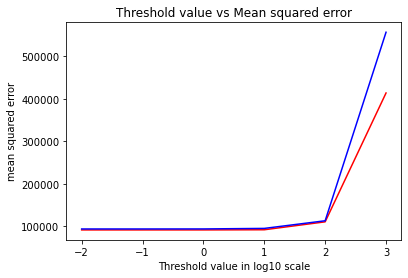

In [115]:
plt.plot(np.log10(th),latest_error, color='red', label="Train")
plt.plot(np.log10(th),latest_error_test, color='blue', label="Test")

plt.title("Threshold value vs Mean squared error")
plt.xlabel("Threshold value in log10 scale")
plt.ylabel("mean squared error")

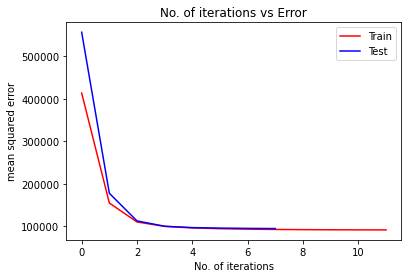

In [114]:
iterations = 100
theta1, error1 = gradientDescent_threshold(x_train,y_train,0.6,iterations,10)
theta2, error2 = gradientDescent_threshold(x_test,y_test,0.6,iterations,10)

plt.plot(error1, color='red', label="Train")
plt.plot(error2, color='blue', label="Test")



plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

## Experiment 3

In [40]:
x3 = data[[5,6,7,8,9,10,11,12]].values
y3 = data[[0]].values

In [41]:
x3_train, x3_test = x3[:6132,:], x3[6132:,:]
print(x3_train.shape, x3_test.shape)
y3_train, y3_test = y3[:6132,:], y3[6132:,:]
print(y3_train.shape, y3_test.shape)

(6132, 8) (2628, 8)
(6132, 1) (2628, 1)


In [42]:
x3_train = feature_normalization(x3_train)
X30 = np.ones((len(x3_train),1))
x3_train = np.append(X30,x3_train,axis=1)

x3_test = feature_normalization(x3_test)
X31 = np.ones((len(x3_test),1))
x3_test = np.append(X31,x3_test,axis=1)

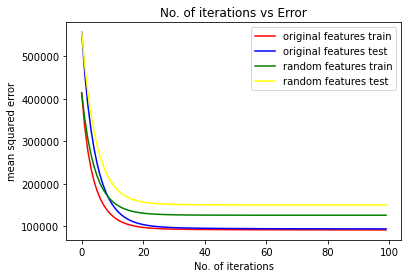

In [113]:
iterations = 100
theta1, error1 = gradientDescent(x_train,y_train,0.1,iterations)
theta2, error2 = gradientDescent(x_test,y_test,0.1,iterations)
theta3, error3 = gradientDescent(x3_train,y3_train,0.1,iterations)
theta4, error4 = gradientDescent(x3_test,y3_test,0.1,iterations)

plt.plot(error1, color='red', label="original features train")
plt.plot(error2, color='blue', label="original features test")
plt.plot(error3, color='green', label="random features train")
plt.plot(error4, color='yellow', label="random features test")

plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

## Experiment 4

In [106]:
x4 = data[[1,2,4,5,6,7,8,12]].values
y4 = data[[0]].values
x4_train, x4_test = x4[:6132,:], x4[6132:,:]
print(x4_train.shape, x4_test.shape)
y4_train, y4_test = y4[:6132,:], y4[6132:,:]
print(y4_train.shape, y4_test.shape)

(6132, 8) (2628, 8)
(6132, 1) (2628, 1)


In [107]:
x4_train = feature_normalization(x4_train)
X40 = np.ones((len(x4_train),1))
x4_train = np.append(X40,x4_train,axis=1)

x4_test = feature_normalization(x4_test)
X41 = np.ones((len(x4_test),1))
x4_test = np.append(X41,x4_test,axis=1)

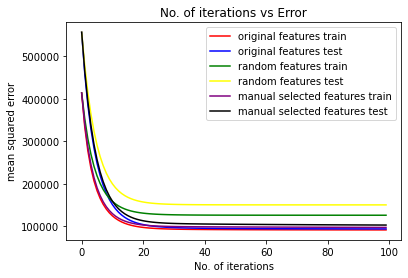

In [112]:
iterations = 100
alpha = 0.1
theta1, error1 = gradientDescent(x_train,y_train,alpha,iterations)
theta2, error2 = gradientDescent(x_test,y_test,alpha,iterations)
theta3, error3 = gradientDescent(x3_train,y3_train,alpha,iterations)
theta4, error4 = gradientDescent(x3_test,y3_test,alpha,iterations)
theta5, error5 = gradientDescent(x4_train,y4_train,alpha,iterations)
theta6, error6 = gradientDescent(x4_test,y4_test,alpha,iterations)

plt.plot(error1, color='red', label="original features train")
plt.plot(error2, color='blue', label="original features test")
plt.plot(error3, color='green', label="random features train")
plt.plot(error4, color='yellow', label="random features test")
plt.plot(error5, color='purple', label="manual selected features train")
plt.plot(error6, color='black', label="manual selected features test")

plt.title("No. of iterations vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("mean squared error")



plt.legend()
plt.show()

In [111]:
print('Original Set of features: Train data maximum and minimum error')
print(max(error1), min(error1))
print('Original Set of features: Test data maximum and minimum error')
print(max(error2), min(error2))
print('Random Set of features: Train data maximum and minimum error')
print(max(error3), min(error3))
print('Random Set of features: Test data maximum and minimum error')
print(max(error4), min(error4))
print('Manually selected Set of features: Train data maximum and minimum error')
print(max(error5), min(error5))
print('Manually selected Set of features: Test data maximum and minimum error')
print(max(error6), min(error6))

Original Set of features: Train data maximum and minimum error
413352.87092302676 91375.1521584842
Original Set of features: Test data maximum and minimum error
556240.4644216134 93732.8699927596
Random Set of features: Train data maximum and minimum error
413352.87092302676 125923.49300360223
Random Set of features: Test data maximum and minimum error
556240.4644216134 150229.5770076141
Manually selected Set of features: Train data maximum and minimum error
413352.87092302676 97258.7099154246
Manually selected Set of features: Test data maximum and minimum error
556240.4644216134 102808.01089571702
